# Selection of the best model setting for predicting Statistical Parity, Equal Opportunity and Average Odds

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

## Multilinear Regression

In [7]:
mlp_rmse_all = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_all_features.csv")
)
mlp_rmse_meta = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_metafeatures.csv")
)
mlp_rmse_symp = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_rmse_scores_bias_symptoms.csv")
)

In [8]:
mlp_r2_all = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_all_features.csv")
)
mlp_r2_meta = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_metafeatures.csv")
)
mlp_r2_symp = pd.read_csv(
    os.path.join("model_scores", "mlp", "mlp_r2_scores_bias_symptoms.csv")
)

### Results with RMSE

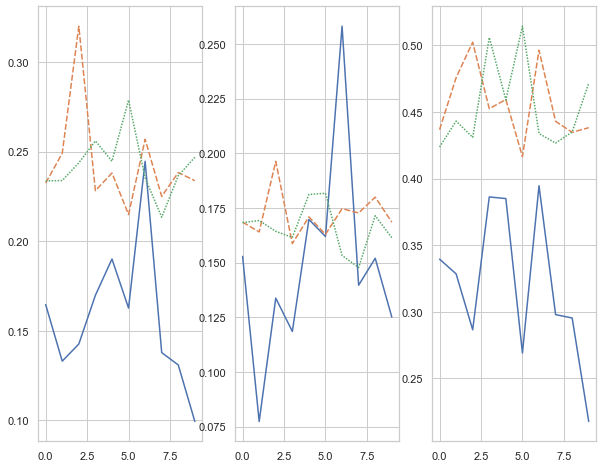

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(10, 8))

sns.lineplot(
    data=[
        mlp_rmse_symp["Statistical Parity"].values,
        mlp_rmse_meta["Statistical Parity"].values,
        mlp_rmse_all["Statistical Parity"].values,
    ],
    ax=ax[0],
    legend=False,
)
sns.lineplot(
    data=[
        mlp_rmse_symp["Equal Opportunity"].values,
        mlp_rmse_meta["Equal Opportunity"].values,
        mlp_rmse_all["Equal Opportunity"].values,
    ],
    ax=ax[1],
    legend=False,
)
sns.lineplot(
    data=[
        mlp_rmse_symp["Average Odds"].values,
        mlp_rmse_meta["Average Odds"].values,
        mlp_rmse_all["Average Odds"].values,
    ],
    ax=ax[2],
    legend=False,
)

plt.show()

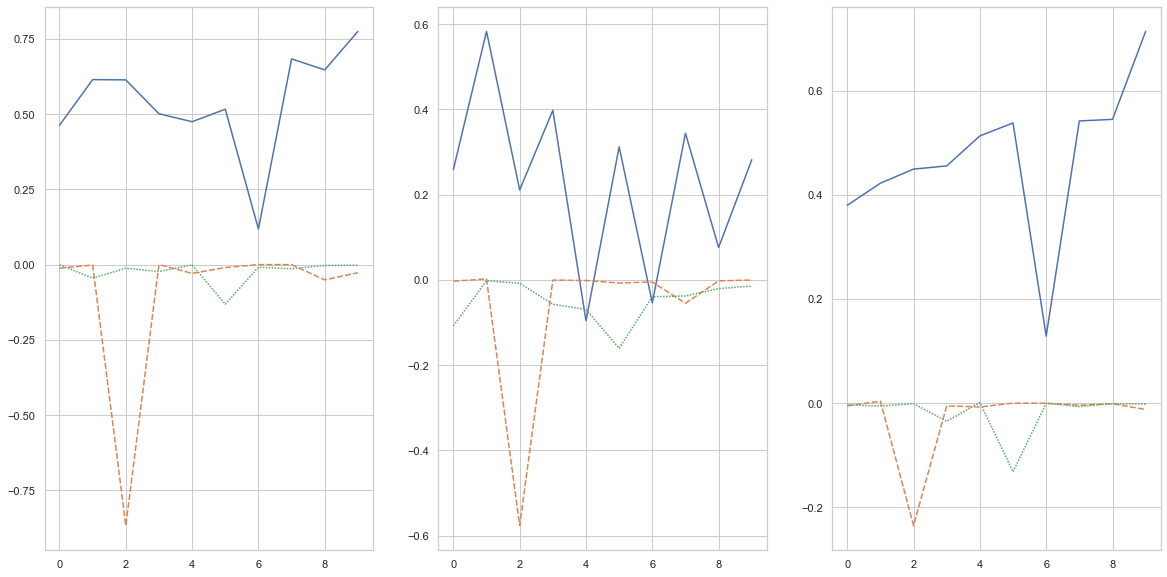

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

sns.lineplot(
    data=[
        mlp_r2_symp["Statistical Parity"].values,
        mlp_r2_meta["Statistical Parity"].values,
        mlp_r2_all["Statistical Parity"].values,
    ],
    ax=ax[0],
    legend=False,
)
sns.lineplot(
    data=[
        mlp_r2_symp["Equal Opportunity"].values,
        mlp_r2_meta["Equal Opportunity"].values,
        mlp_r2_all["Equal Opportunity"].values,
    ],
    ax=ax[1],
    legend=False,
)
sns.lineplot(
    data=[
        mlp_r2_symp["Average Odds"].values,
        mlp_r2_meta["Average Odds"].values,
        mlp_r2_all["Average Odds"].values,
    ],
    ax=ax[2],
    legend=False,
)

plt.show()